In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist

(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

print(np.min(Xtrain), np.max(Xtrain))
print(np.min(Xtest), np.max(Xtest))

Xtrain = Xtrain / 255.0
Xtest = Xtest / 255.0

print(np.min(Xtrain), np.max(Xtrain))
print(np.min(Xtest), np.max(Xtest))

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
0 255
0 255
0.0 1.0
0.0 1.0


In [2]:
from sklearn.model_selection import train_test_split

Xlearn, Xval, ylearn, yval = train_test_split(Xtrain, ytrain, 
                                              stratify = ytrain,
                                              random_state = 1234,
                                              shuffle = True,
                                              test_size = 1 / 6)

print(Xlearn.shape, ylearn.shape)
print(Xval.shape, yval.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)


In [3]:
Xlearn.shape

(50000, 28, 28)

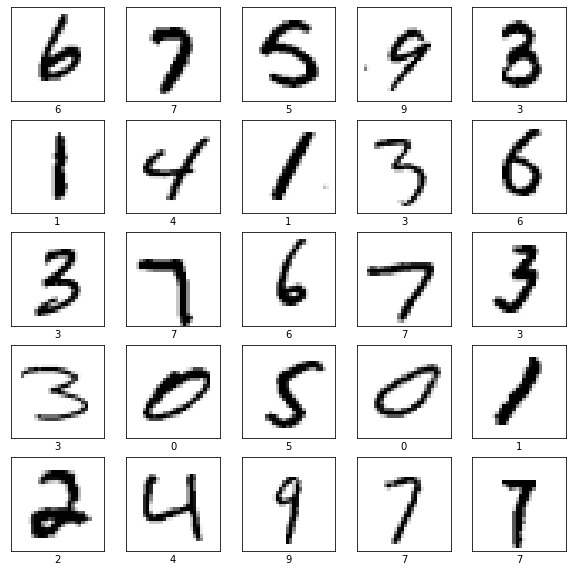

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xlearn[i,:], cmap = plt.cm.binary)
    plt.xlabel(ylearn[i])
plt.show()

In [5]:
print(np.unique(ylearn))
print(np.max(ylearn) + 1)


[0 1 2 3 4 5 6 7 8 9]
10


In [11]:
import tensorflow as tf
from tensorflow import keras

mlp_mnist = keras.Sequential([
    keras.layers.Input(name = "input", shape = (Xlearn.shape[1], Xlearn.shape[2])),
    keras.layers.Flatten(name = "vectorize"),
    keras.layers.Dense(128, name = "first_relu", activation = "relu"),
    keras.layers.Dense(32, name = "second_relu", activation = "relu"),
    keras.layers.Dense(np.max(ylearn) + 1, name = "output", activation = "softmax")
])

mlp_mnist.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vectorize (Flatten)         (None, 784)               0         
                                                                 
 first_relu (Dense)          (None, 128)               100480    
                                                                 
 second_relu (Dense)         (None, 32)                4128      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


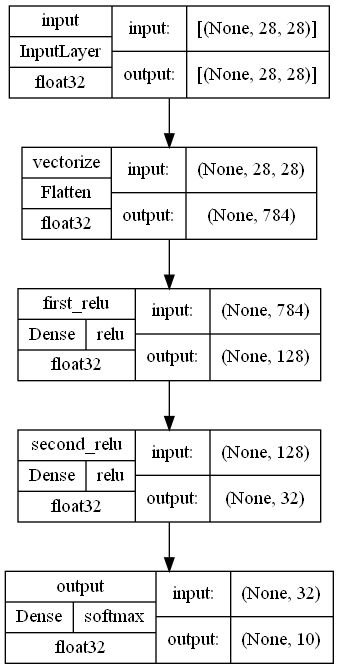

In [12]:

keras.utils.plot_model(mlp_mnist,
                       show_shapes = True,
                       show_dtype = True,
                       show_layer_activations = True
                       )

In [10]:

# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = mnist.load_data()
# split into input (X) and output (Y) variables

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
# evaluate the model


In [19]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="My first neural network")

In [10]:
print((784 + 1) * 128)
print((128 + 1) * 32)

100480
4128


In [11]:
mlp_mnist.compile(optimizer = "adam",
                  loss = "sparse_categorical_crossentropy",
                  metrics = ["accuracy"])

In [12]:
mlp_history = mlp_mnist.fit(Xlearn, ylearn,
                            epochs = 20,
                            verbose = 0, batch_size = 32,
                            validation_data = (Xval, yval))

In [13]:
print(mlp_mnist.evaluate(Xlearn, ylearn))
print(mlp_mnist.evaluate(Xval, yval))
print(mlp_mnist.evaluate(Xtest, ytest))

1563/1563 [==============================] - 2s 1ms/step - loss: 0.0025 - accuracy: 0.9992
[0.002487726276740432, 0.999239981174469]
313/313 [==============================] - 0s 1ms/step - loss: 0.1115 - accuracy: 0.9775
[0.11148407310247421, 0.9775000214576721]
313/313 [==============================] - 0s 1ms/step - loss: 0.1201 - accuracy: 0.9784
[0.12012699991464615, 0.9783999919891357]


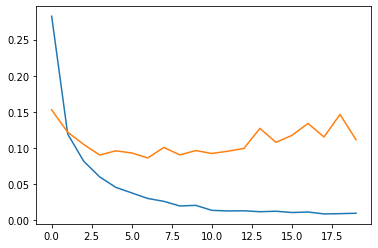

In [14]:
plt.plot(mlp_history.history["loss"])
plt.plot(mlp_history.history["val_loss"])
plt.show()

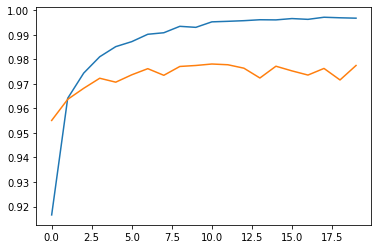

In [15]:
plt.plot(mlp_history.history["accuracy"])
plt.plot(mlp_history.history["val_accuracy"])
plt.show()

(784, 128)


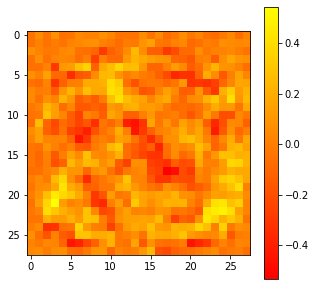

In [16]:
W = mlp_mnist.layers[1].weights[0].numpy()
print(W.shape)

plt.figure(figsize = (5, 5))
plt.imshow(W[:,127].reshape(28, 28), cmap = plt.cm.autumn)
plt.colorbar()
plt.show()

In [17]:
P = mlp_mnist.predict(Xtest)
print(P.shape)
print(P[1023,:])
print(ytest[1023])

313/313 [==============================] - 0s 1ms/step
(10000, 10)
[2.2269535e-11 1.7256721e-14 4.0260506e-19 4.9977229e-22 1.0000000e+00
 2.3174800e-12 1.5007943e-11 8.4517957e-14 5.6322814e-17 8.3690336e-15]
4


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vectorize (Flatten)         (None, 784)               0         
                                                                 
 first_relu (Dense)          (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 second_relu (Dense)         (None, 32)                4128      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


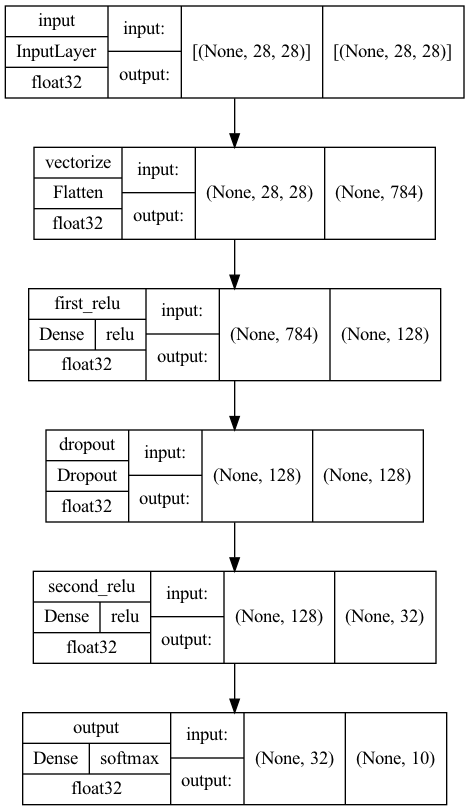

In [15]:
mlp_mnist_with_dropout = keras.Sequential([
    keras.layers.Input(name = "input", shape = (Xlearn.shape[1], Xlearn.shape[2])),
    keras.layers.Flatten(name = "vectorize"),
    keras.layers.Dense(128, name = "first_relu", activation = "relu"),
    keras.layers.Dropout(name = "dropout", rate = 0.5),
    keras.layers.Dense(32, name = "second_relu", activation = "relu"),
    keras.layers.Dense(np.max(ylearn) + 1, name = "output", activation = "softmax")
])

mlp_mnist_with_dropout.summary()

keras.utils.plot_model(mlp_mnist_with_dropout,
                       show_shapes = True,
                       show_dtype = True,
                       show_layer_activations = True)

In [16]:
mlp_mnist_with_dropout.compile(optimizer = "adam",
                               loss = "sparse_categorical_crossentropy",
                               metrics = ["accuracy"])

In [17]:
mlp_history = mlp_mnist_with_dropout.fit(Xlearn, ylearn,
                                         epochs = 20,
                                         verbose = 0, batch_size = 32,
                                         validation_data = (Xval, yval))

In [18]:
print(mlp_mnist_with_dropout.evaluate(Xlearn, ylearn))
print(mlp_mnist_with_dropout.evaluate(Xval, yval))
print(mlp_mnist_with_dropout.evaluate(Xtest, ytest))

1563/1563 [==============================] - 1s 810us/step - loss: 0.0297 - accuracy: 0.9909
[0.029682084918022156, 0.9909399747848511]
313/313 [==============================] - 0s 804us/step - loss: 0.0877 - accuracy: 0.9762
[0.08767526596784592, 0.9761999845504761]
313/313 [==============================] - 0s 802us/step - loss: 0.0880 - accuracy: 0.9753
[0.08804205060005188, 0.9753000140190125]


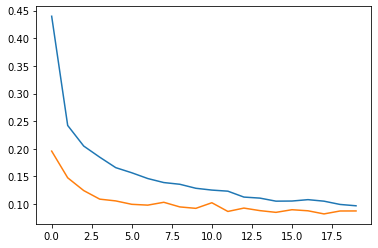

In [19]:
plt.plot(mlp_history.history["loss"])
plt.plot(mlp_history.history["val_loss"])
plt.show()

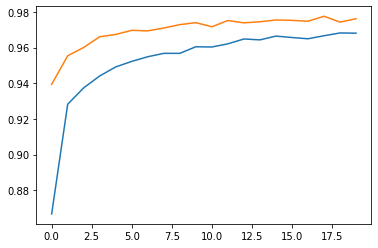

In [20]:
plt.plot(mlp_history.history["accuracy"])
plt.plot(mlp_history.history["val_accuracy"])
plt.show()

In [18]:
# even versus odd
# {0, 2, 4, 6, 8} versus {1, 3, 5, 7, 9}

mlp_mnist_binary = keras.Sequential([
    keras.layers.Input(name = "input", shape = (Xlearn.shape[1], Xlearn.shape[2])),
    keras.layers.Flatten(name = "vectorize"),
    keras.layers.Dense(128, name = "first_relu", activation = "relu"),
    keras.layers.Dense(32, name = "second_relu", activation = "relu"),
    keras.layers.Dense(1, name = "output", activation = "sigmoid")
])

mlp_mnist_binary.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vectorize (Flatten)         (None, 784)               0         
                                                                 
 first_relu (Dense)          (None, 128)               100480    
                                                                 
 second_relu (Dense)         (None, 32)                4128      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 104,641
Trainable params: 104,641
Non-trainable params: 0
_________________________________________________________________


In [19]:
mlp_mnist_binary.compile(optimizer = "adam",
                         loss = "binary_crossentropy",
                         metrics = ["accuracy", "AUC"])

In [20]:
print(ylearn)
print(ylearn % 2)

print(np.mean((ylearn % 2) == 0))
print(np.mean((ylearn % 2) == 1))

[6 7 5 ... 6 5 2]
[0 1 1 ... 0 1 0]
0.49154
0.50846


In [24]:
np.mean((ylearn % 2) == 0)

0.49154

In [25]:
np.mean((ylearn % 2) == 1)

0.50846

In [24]:
mlp_history = mlp_mnist_binary.fit(Xlearn, ylearn % 2,
                                   epochs = 20,
                                   class_weight = {1: 0.49,
                                                   0: 0.50},
                                   verbose = 1, batch_size = 32,
                                   validation_data = (Xval, yval % 2))

Epoch 1/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0557 - accuracy: 0.9587 - auc: 0.9920 - val_loss: 0.0675 - val_accuracy: 0.9768 - val_auc: 0.9965
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0264 - accuracy: 0.9813 - auc: 0.9977 - val_loss: 0.0527 - val_accuracy: 0.9824 - val_auc: 0.9977
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0191 - accuracy: 0.9867 - auc: 0.9986 - val_loss: 0.0525 - val_accuracy: 0.9825 - val_auc: 0.9971
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0147 - accuracy: 0.9896 - auc: 0.9992 - val_loss: 0.0565 - val_accuracy: 0.9821 - val_auc: 0.9970
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0121 - accuracy: 0.9915 - auc: 0.9993 - val_loss: 0.0494 - val_accuracy: 0.9858 - val_auc: 0.9972
Epoch 6/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0100 - accuracy: 0.9927 - auc: 0.9996 - va

In [25]:
print(mlp_mnist_binary.evaluate(Xlearn, ylearn % 2))
print(mlp_mnist_binary.evaluate(Xval, yval % 2))
print(mlp_mnist_binary.evaluate(Xtest, ytest % 2))

1563/1563 [==============================] - 1s 930us/step - loss: 0.0018 - accuracy: 0.9994 - auc: 1.0000
[0.0018345364369452, 0.9993799924850464, 0.9999976754188538]
313/313 [==============================] - 0s 963us/step - loss: 0.0729 - accuracy: 0.9883 - auc: 0.9946
[0.07288770377635956, 0.9883000254631042, 0.9945726990699768]
313/313 [==============================] - 0s 984us/step - loss: 0.0792 - accuracy: 0.9870 - auc: 0.9941
[0.0791720449924469, 0.9869999885559082, 0.9941210150718689]


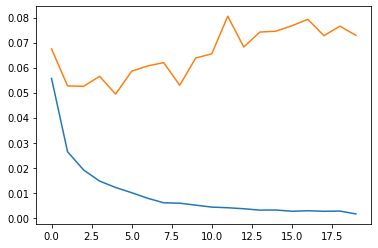

In [26]:
plt.plot(mlp_history.history["loss"])
plt.plot(mlp_history.history["val_loss"])
plt.show()

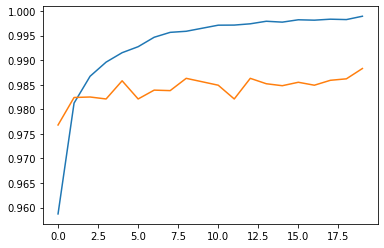

In [27]:
plt.plot(mlp_history.history["accuracy"])
plt.plot(mlp_history.history["val_accuracy"])
plt.show()

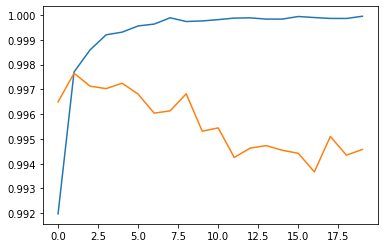

In [28]:
plt.plot(mlp_history.history["auc"])
plt.plot(mlp_history.history["val_auc"])
plt.show()

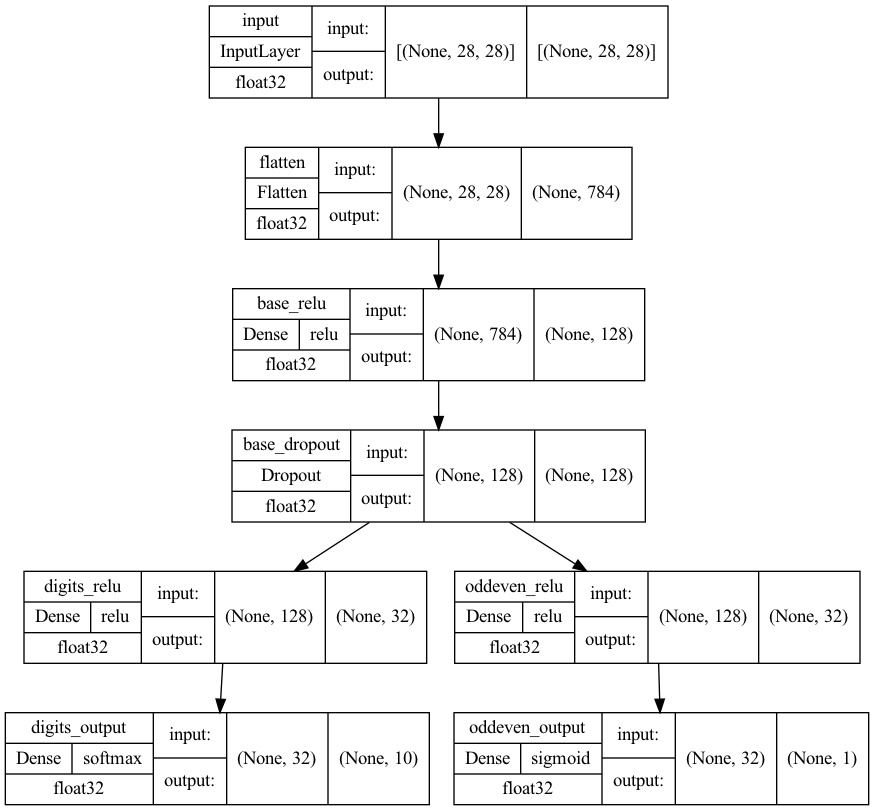

In [29]:
input_layer = keras.layers.Input(name = "input", 
                                 shape = (Xlearn.shape[1],
                                          Xlearn.shape[2]))

base_model = keras.layers.Flatten()(input_layer)
base_model = keras.layers.Dense(128, name = "base_relu",
                                activation = "relu")(base_model)
base_model = keras.layers.Dropout(rate = 0.5, 
                                  name = "base_dropout")(base_model)

digit_model = keras.layers.Dense(32, name = "digits_relu",
                                 activation = "relu")(base_model)
digit_model = keras.layers.Dense(10, name = "digits_output",
                                 activation = "softmax")(digit_model)

oddeven_model = keras.layers.Dense(32, name = "oddeven_relu",
                                   activation = "relu")(base_model)
oddeven_model = keras.layers.Dense(1, name = "oddeven_output",
                                   activation = "sigmoid")(oddeven_model)

complete_model = keras.models.Model(inputs = input_layer,
                                    outputs = [digit_model, oddeven_model])

keras.utils.plot_model(complete_model, show_shapes = True,
                       show_dtype = True,
                       show_layer_activations = True,
                       show_layer_names = True)

In [30]:
complete_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten (Flatten)              (None, 784)          0           ['input[0][0]']                  
                                                                                                  
 base_relu (Dense)              (None, 128)          100480      ['flatten[0][0]']                
                                                                                                  
 base_dropout (Dropout)         (None, 128)          0           ['base_relu[0][0]']              
                                                                                              

In [31]:
complete_model.compile(optimizer = "adam",
                       loss = {"digits_output": "sparse_categorical_crossentropy",
                               "oddeven_output": "binary_crossentropy"},
                       loss_weights = {"digits_output": 0.5, 
                                       "oddeven_output": 0.5},
                       metrics = {"digits_output": ["accuracy"],
                                  "oddeven_output": ["accuracy", "AUC"]}
                      )

In [32]:
multi_output_history = complete_model.fit(Xlearn, 
                                          {"digits_output": ylearn,
                                           "oddeven_output": ylearn % 2},
                                          epochs = 20,
                                          batch_size = 32,
                                          verbose = 1,
                                          validation_data = (Xval, {"digits_output": yval,
                                           "oddeven_output": yval % 2}))

Epoch 1/20
1563/1563 [==============================] - 5s 2ms/step - loss: 0.3196 - digits_output_loss: 0.4578 - oddeven_output_loss: 0.1815 - digits_output_accuracy: 0.8616 - oddeven_output_accuracy: 0.9291 - oddeven_output_auc: 0.9798 - val_loss: 0.1318 - val_digits_output_loss: 0.1842 - val_oddeven_output_loss: 0.0794 - val_digits_output_accuracy: 0.9434 - val_oddeven_output_accuracy: 0.9705 - val_oddeven_output_auc: 0.9961
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1727 - digits_output_loss: 0.2424 - oddeven_output_loss: 0.1031 - digits_output_accuracy: 0.9278 - oddeven_output_accuracy: 0.9638 - oddeven_output_auc: 0.9926 - val_loss: 0.1071 - val_digits_output_loss: 0.1458 - val_oddeven_output_loss: 0.0683 - val_digits_output_accuracy: 0.9552 - val_oddeven_output_accuracy: 0.9746 - val_oddeven_output_auc: 0.9964
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1459 - digits_output_loss: 0.2049 - oddeven_output_loss: 0

Epoch 20/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0694 - digits_output_loss: 0.0991 - oddeven_output_loss: 0.0398 - digits_output_accuracy: 0.9681 - oddeven_output_accuracy: 0.9862 - oddeven_output_auc: 0.9986 - val_loss: 0.0634 - val_digits_output_loss: 0.0883 - val_oddeven_output_loss: 0.0384 - val_digits_output_accuracy: 0.9751 - val_oddeven_output_accuracy: 0.9882 - val_oddeven_output_auc: 0.9983


In [33]:
print(complete_model.evaluate(Xlearn, {"digits_output": ylearn,
                                       "oddeven_output": ylearn % 2}))
print(complete_model.evaluate(Xval, {"digits_output": yval,
                                     "oddeven_output": yval % 2}))
print(complete_model.evaluate(Xtest, {"digits_output": ytest,
                                      "oddeven_output": ytest % 2}))

1563/1563 [==============================] - 2s 1ms/step - loss: 0.0215 - digits_output_loss: 0.0301 - oddeven_output_loss: 0.0129 - digits_output_accuracy: 0.9908 - oddeven_output_accuracy: 0.9961 - oddeven_output_auc: 0.9999
[0.021509729325771332, 0.030115019530057907, 0.012904450297355652, 0.9908400177955627, 0.9960600137710571, 0.9998722076416016]
313/313 [==============================] - 0s 1ms/step - loss: 0.0634 - digits_output_loss: 0.0883 - oddeven_output_loss: 0.0384 - digits_output_accuracy: 0.9751 - oddeven_output_accuracy: 0.9882 - oddeven_output_auc: 0.9983
[0.06335420161485672, 0.08826488256454468, 0.038443490862846375, 0.9750999808311462, 0.9882000088691711, 0.998339831829071]
313/313 [==============================] - 0s 1ms/step - loss: 0.0590 - digits_output_loss: 0.0844 - oddeven_output_loss: 0.0336 - digits_output_accuracy: 0.9774 - oddeven_output_accuracy: 0.9898 - oddeven_output_auc: 0.9984
[0.058983009308576584, 0.08438577502965927, 0.0335802361369133, 0.977400